## Part 2 - Two Sample T Test ##
https://www.codecademy.com/courses/learn-scipy-hypothesis-testing/lessons/hypothesis-testing/exercises/two-sample-t-test

*Suppose that last week, the average amount of time spent per visitor to a website was 25 minutes. This week, the average amount of time spent per visitor to a website was 28 minutes. Did the average time spent per visitor change? Or is this part of natural fluctuations?*

Use a **2 Sample T-Test**  
A 2 Sample T-Test compares two independant sets of data, which are both approximately normally distributed.  
The null hypothesis, in this case, is that the two distributions have the same mean (give or take some statisical random variation).  
   
To decide if the data-sets are roughly normally distributed, often a visual inspection is enough, as shown in the chart below.  Alternatively the Sapiro-Wilk test can be used: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html

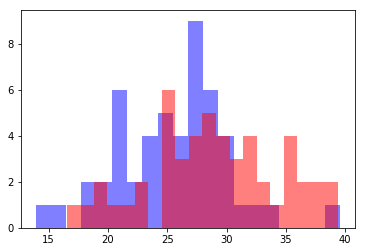

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist(week1, bins=20, color='b', alpha=0.5)
plt.hist(week2, bins=20, color='r', alpha=0.5)
plt.show()

use SciPy's `ttest_ind` to obtain the p-value for two independant sets of data and determine the likelihood of them having the same mean.

In [11]:
from scipy.stats import ttest_ind
import numpy as np

week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")

week1_mean = week1.mean()
week2_mean = week2.mean()

print("Week 1 Sample Mean:", week1_mean)
print("Week 2 Sample Mean:", week2_mean)

pval = ttest_ind(week1,week2)
print(pval)

Week 1 Sample Mean: 25.4480593952
Week 2 Sample Mean: 29.0215681076
Ttest_indResult(statistic=-3.510875818698744, pvalue=0.000676767690454633)


If we assume $\alpha$ is 0.005 and we get a `pvalue=0.0006767...` means we reject the null-hypothesis and say this is a different distribution and the mean is significantly different.



In [12]:
if pval[1] < 0.05:
    print("pval is ", pval[1], "Null Hypothesis Rejected - samples are statistically different")
else:
    print("pval is ", pval[1], "Null Hypothesis Accepted - samples are NOT statistically different")

pval is  0.000676767690454633 Null Hypothesis Rejected - samples are statistically different


## Dangers of Multiple T-Tests ##
(taken from Codecademy)
Suppose that we own a chain of stores that sell ants, called VeryAnts. There are three different locations: A, B, and C. We want to know if the average ant sales over the past year are significantly different between the three locations.  

At first, it seems that we could perform T-tests between each pair of stores.   

We know that the p-value is the probability that we incorrectly reject the null hypothesis on each t-test. The more t-tests we perform, the more likely that we are to get a false positive, a Type I error.   

For a p-value of 0.05, if the null hypothesis is true then the probability of obtaining a significant result is  
`1 – 0.05 = 0.95.  `  
  
When we run another t-test, the probability of still getting a correct result is  
`0.95 * 0.95 = 0.9025`  
That means our probability of making an error is now close to 10%! This error probability only gets bigger with the more t-tests we do.